## Consider only the below columns and prepare a prediction model for predicting Price.

#### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms


# Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
TC_data = pd.read_excel('ToyotaCorolla1.xlsx')
TC_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
TC_data=TC_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

TC_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Data Understanding

### Initial Analysis

In [4]:
TC_data.shape

(1436, 9)

In [5]:
TC_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
TC_data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

## Assumptions Check

### Normality Test

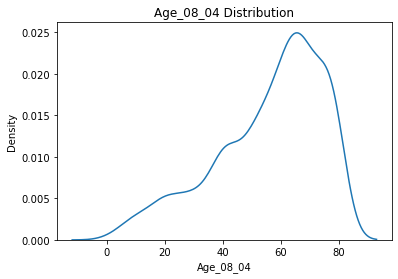

In [7]:
sns.distplot(a=TC_data['Age_08_04'], hist=False)
plt.title('Age_08_04 Distribution')
plt.show()

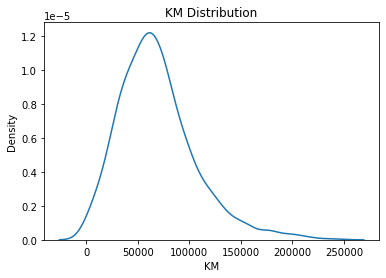

In [8]:
sns.distplot(a=TC_data['KM'], hist=False)
plt.title('KM Distribution')
plt.show()

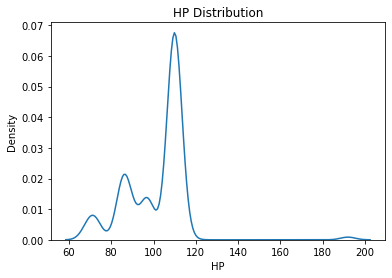

In [9]:
sns.distplot(a=TC_data['HP'], hist=False)
plt.title('HP Distribution')
plt.show()

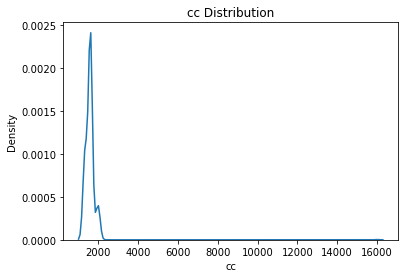

In [10]:
sns.distplot(a=TC_data['cc'], hist=False)
plt.title('cc Distribution')
plt.show()

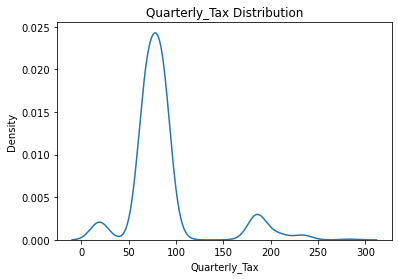

In [11]:
sns.distplot(a=TC_data['Quarterly_Tax'], hist=False)
plt.title('Quarterly_Tax Distribution')
plt.show()

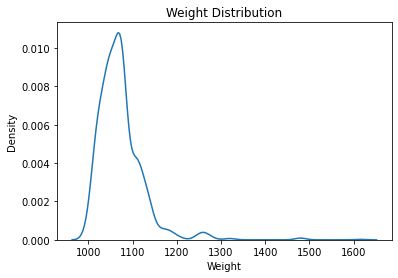

In [12]:
sns.distplot(a=TC_data['Weight'], hist=False)
plt.title('Weight Distribution')
plt.show()

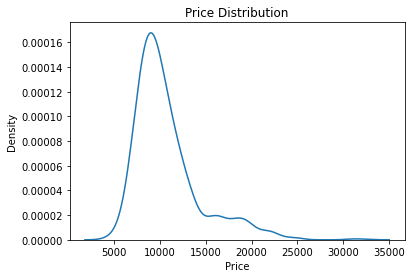

In [13]:
sns.distplot(a=TC_data['Price'], hist=False)
plt.title('Price Distribution')
plt.show()

### Linearity Test

### Multicollinearity

In [14]:
correlat=TC_data.corr().round(2)
correlat

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.00,-0.88,-0.57,0.31,0.13,0.19,0.06,0.22,0.58
Age_08_04,-0.88,1.00,0.51,-0.16,-0.10,-0.15,-0.01,-0.20,-0.47
KM,-0.57,0.51,1.00,-0.33,0.10,-0.04,0.02,0.28,-0.03
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
cc,0.13,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.19,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.02,0.21,0.01,-0.16,1.00,-0.01,0.02
Quarterly_Tax,0.22,-0.20,0.28,-0.30,0.31,0.11,-0.01,1.00,0.63
Weight,0.58,-0.47,-0.03,0.09,0.34,0.30,0.02,0.63,1.00


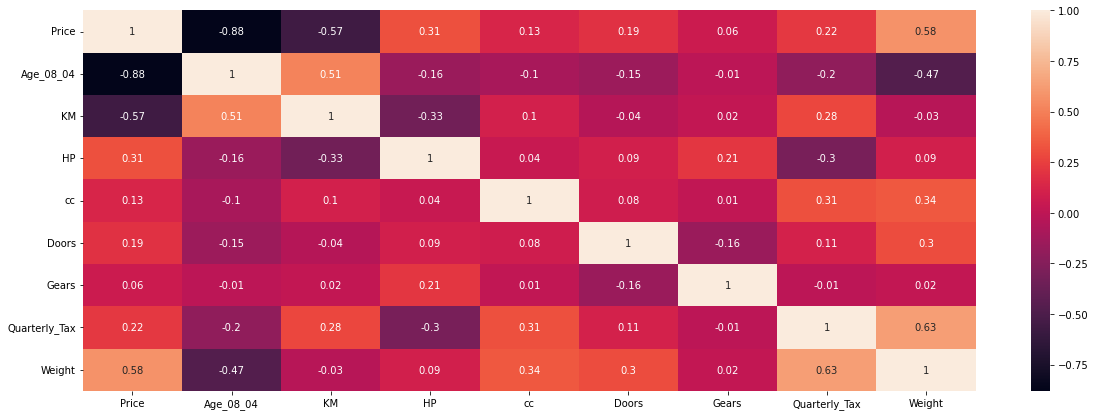

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(data=correlat, annot=True)
plt.show()

# Model Building

In [16]:
x=TC_data.drop(labels=['Price'], axis=1)
y=TC_data[['Price']]

In [17]:
x.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [18]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [19]:
x.shape,y.shape

((1436, 8), (1436, 1))

# Model Training

In [20]:
model = ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:36:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
rsq_cc=ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=TC_data).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_age=ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=TC_data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=TC_data).fit().rsquared
vif_km=1/(1-rsq_km)


rsq_hp=ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=TC_data).fit().rsquared
vif_hp=1/(1-rsq_hp)


rsq_doors=ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=TC_data).fit().rsquared
vif_doors=1/(1-rsq_doors)


rsq_gear=ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=TC_data).fit().rsquared
vif_gear=1/(1-rsq_gear)


rsq_quaterly=ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=TC_data).fit().rsquared
vif_quaterly=1/(1-rsq_quaterly)

rsq_weight=ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=TC_data).fit().rsquared
vif_weight=1/(1-rsq_weight)

In [22]:
vif_df=({'Variables':['CC','Age_04_mnths','KM','HP','Doors','Gears','Quarterly_Tax','Weight'],
     'VIF' :[vif_cc,vif_age,vif_km,vif_hp,vif_doors,vif_gear,vif_quaterly,vif_weight]})
vif_frame=pd.DataFrame(vif_df)
vif_frame

,Variables,VIF
0,CC,1.163894
1,Age_04_mnths,1.884620
2,KM,1.756905
3,HP,1.419422
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


### VIF of all the features is leass than 5 , and so we can say that No MultiCollinearity Problem exists

## Residual Analysis

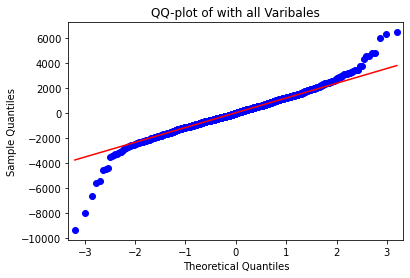

In [23]:
qqplot=smf.qqplot(model.resid,line='q')
plt.title("QQ-plot of with all Varibales")
plt.show()

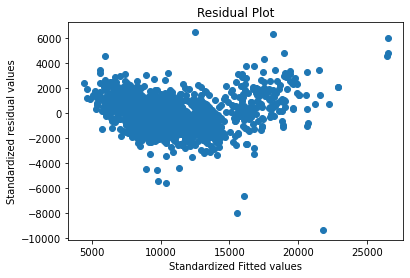

In [24]:
plt.scatter(model.fittedvalues,model.resid)

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Cooks Distance - Model Deletion Diagnostics

In [25]:
modelinf = model.get_influence()
(c, _) = modelinf.cooks_distance
(c, _)

(array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
        8.44762355e-07, 6.97878368e-04, 1.08627724e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999998]))

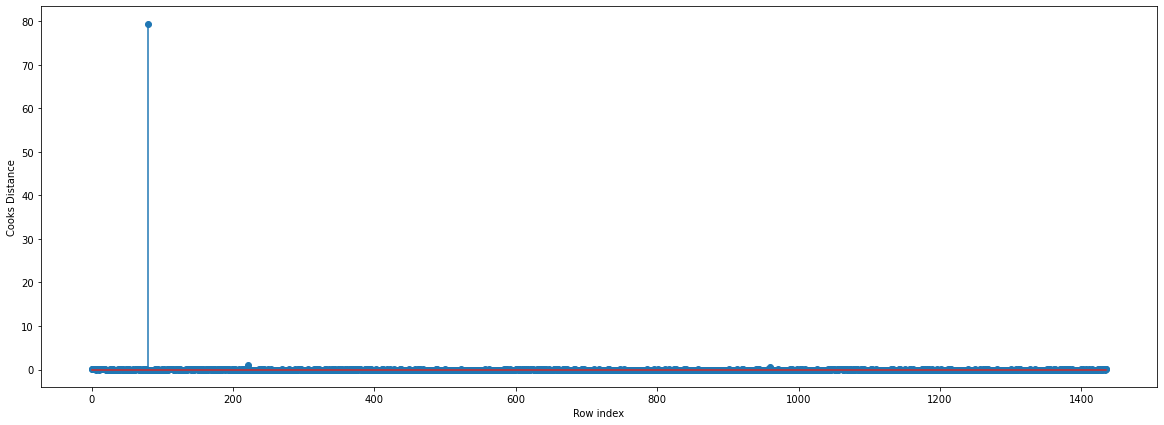

In [26]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(TC_data)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

In [28]:
TC_data1=TC_data.drop(index=[80],axis=0).reset_index()

In [29]:
TC_data1.shape

(1435, 10)

In [30]:
model1 = ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:36:04   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
modelinf = model1.get_influence()
(c, _) = modelinf.cooks_distance
(c, _)

(array([6.76188181e-03, 3.63236662e-03, 4.92319660e-03, ...,
        3.63997681e-06, 9.09665729e-04, 9.71186915e-03]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999999]))

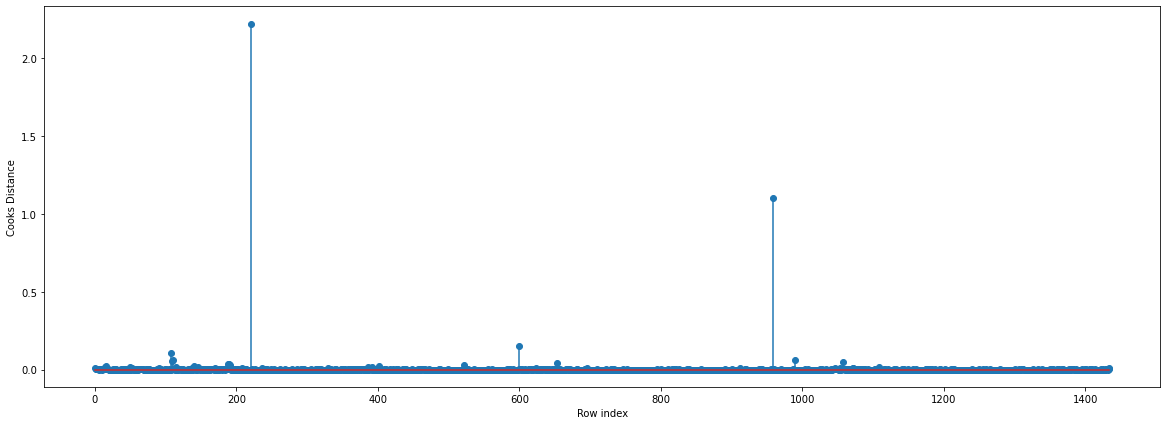

In [32]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(TC_data1)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [33]:
(np.argmax(c),np.max(c))

(220, 2.2244611713001508)

In [34]:
TC_data1=TC_data1.drop(index=[220],axis=0).reset_index()

In [35]:
TC_data1.shape

(1434, 11)

In [36]:
model2 = ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:36:06   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age_08_04      -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
modelinf= model2.get_influence()
(c, _) = modelinf.cooks_distance
(c, _)

(array([6.93766187e-03, 3.72233988e-03, 5.01297081e-03, ...,
        3.95827276e-06, 9.68027939e-04, 1.26386941e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999995]))

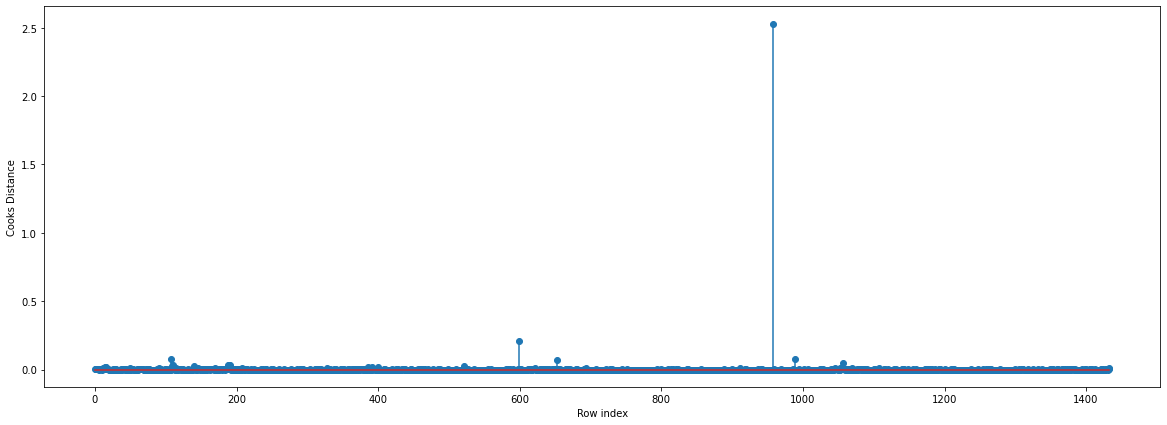

In [38]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(TC_data1)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [39]:
(np.argmax(c),np.max(c))

(958, 2.5312566930233107)

In [40]:
TC_data2=TC_data.drop(index=[80,221,960],axis=0).reset_index()

In [41]:
TC_data2.shape

(1433, 10)

In [42]:
model3 = ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:36:07   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
modelinf= model3.get_influence()
(c, _) = modelinf.cooks_distance
(c, _)

(array([6.81552194e-03, 3.57661581e-03, 4.84694704e-03, ...,
        1.03913055e-05, 1.10085349e-03, 1.82383296e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999977]))

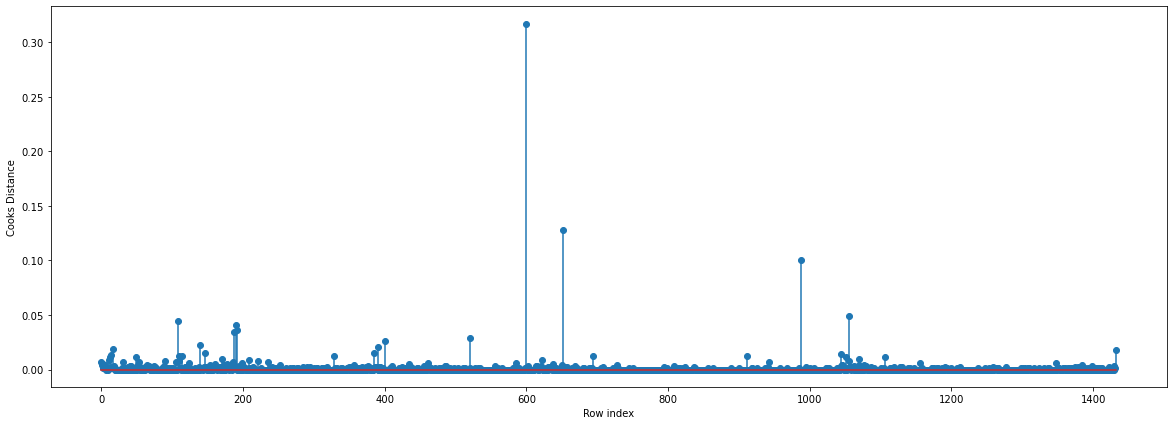

In [44]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(TC_data2)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [45]:
model3.summary()       #Best Fit Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:36:08   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
x=TC_data2.drop(labels=['Price'], axis=1)
y=TC_data2[['Price']]

In [52]:
x.shape, y.shape

((1433, 9), (1433, 1))

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [56]:
print(X_train.shape,
X_test.shape,y_train.shape,y_test.shape)

(1146, 9) (287, 9) (1146, 1) (287, 1)


In [57]:
y_train_pred = model3.predict(X_train)

In [58]:
train_resid = y_train_pred - y_train['Price']

In [59]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

1258.9789851861417

In [60]:
y_test_pred = model3.predict(X_test)

In [61]:
test_resid = y_test_pred - y_test['Price']

In [62]:
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

1092.6552449954988